<ul><font size = 5 color='Orange'>
Learning Goals</font>
<font color = 'Orange'><li>Obtaining the Dataset</li>
<li>Handling missing values</li>
<li>Encoding the categorical data</li>
<li>EDA</li>
<li>Visualizations</li>
</ul>


The Dataset for this exercise depends on your index number i.e number_of_data_set = index % 10:


0.  https://www.kaggle.com/ruchi798/drug-overdose-deaths
1.  https://www.kaggle.com/rishidamarla/employee-data-from-the-city-of-chicago
2.  https://www.kaggle.com/vikasukani/loan-eligible-dataset
3.  https://www.kaggle.com/tamilsel/healthcare-providers-data
4.  https://www.kaggle.com/chirag9073/europe-economic-crisis
5.  https://www.kaggle.com/bryanb/cac40-stocks-dataset
6.  https://www.kaggle.com/christofel04/cardiovascular-study-dataset-predict-heart-disea
7.  https://www.kaggle.com/tsaustin/us-historical-stock-prices-with-earnings-data
8.  https://www.kaggle.com/kimjihoo/coronavirusdataset (Dataset: PatientInfo.csv)
9.  https://www.kaggle.com/mczielinski/bitcoin-historical-data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# <font color = 'Orange'> Read your Dataset (.csv)</font>

In [2]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/VNP/PatientInfo.csv')
data

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2.002000e+09,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1.000000e+09,2,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5160,7000000015,female,30s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,25,NaN,2020-05-30,2020-06-13,NaN,released
5161,7000000016,NaN,NaN,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-16,2020-06-24,NaN,released
5162,7000000017,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,72,NaN,2020-06-18,NaN,NaN,isolated
5163,7000000018,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated


# <font color = 'Orange'> Target column/columns </font>

Write some info about the target value/values



Target column: infection_case

Visualize the target column

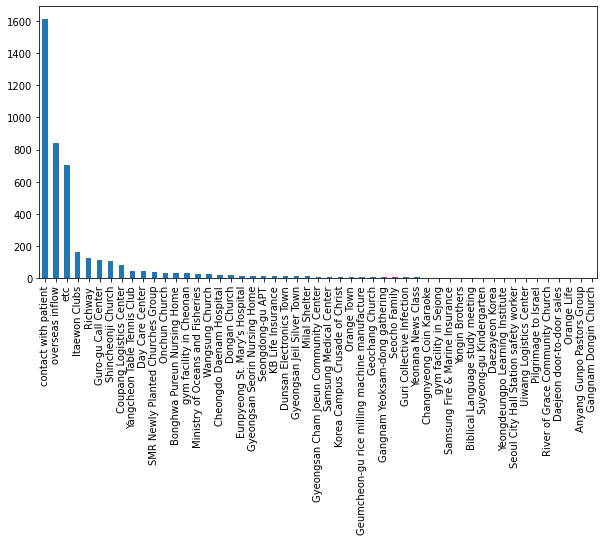

In [3]:
data['infection_case'].value_counts().plot.bar(figsize=(10,5))

# <font color = 'Orange'>Detect the Missing values</font>

Count the percentage of missing values in every column of the Dataset. 

In [4]:
missing_values = data.isnull().sum()
percentage = missing_values / len(data) * 100
percentage

patient_id             0.000000
sex                   21.742498
age                   26.737657
country                0.019361
province               0.019361
city                   1.839303
infection_case        17.812197
infected_by           73.959342
contact_number        84.685382
symptom_onset_date    86.640852
confirmed_date         0.077444
released_date         69.273959
deceased_date         98.722168
state                  0.019361
dtype: float64

Visualize the missing values using Missingno library

In [5]:
import missingno as msno

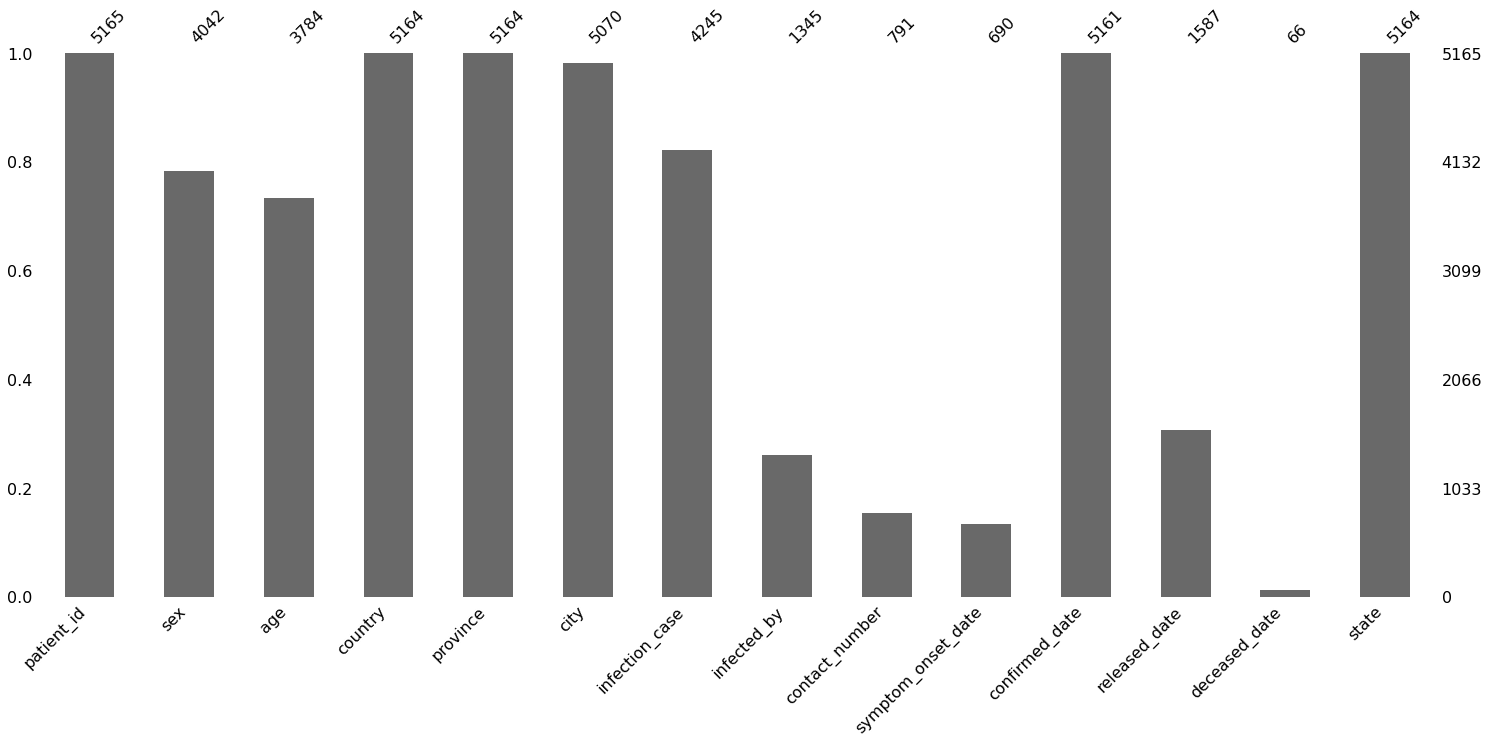

In [6]:
msno.bar(data)

## <font color = 'Orange'> Find reasons for the missing values</font> 


With the help of visualization matrix, heatmap, dendrogram, show the dependence between the columns with missing values

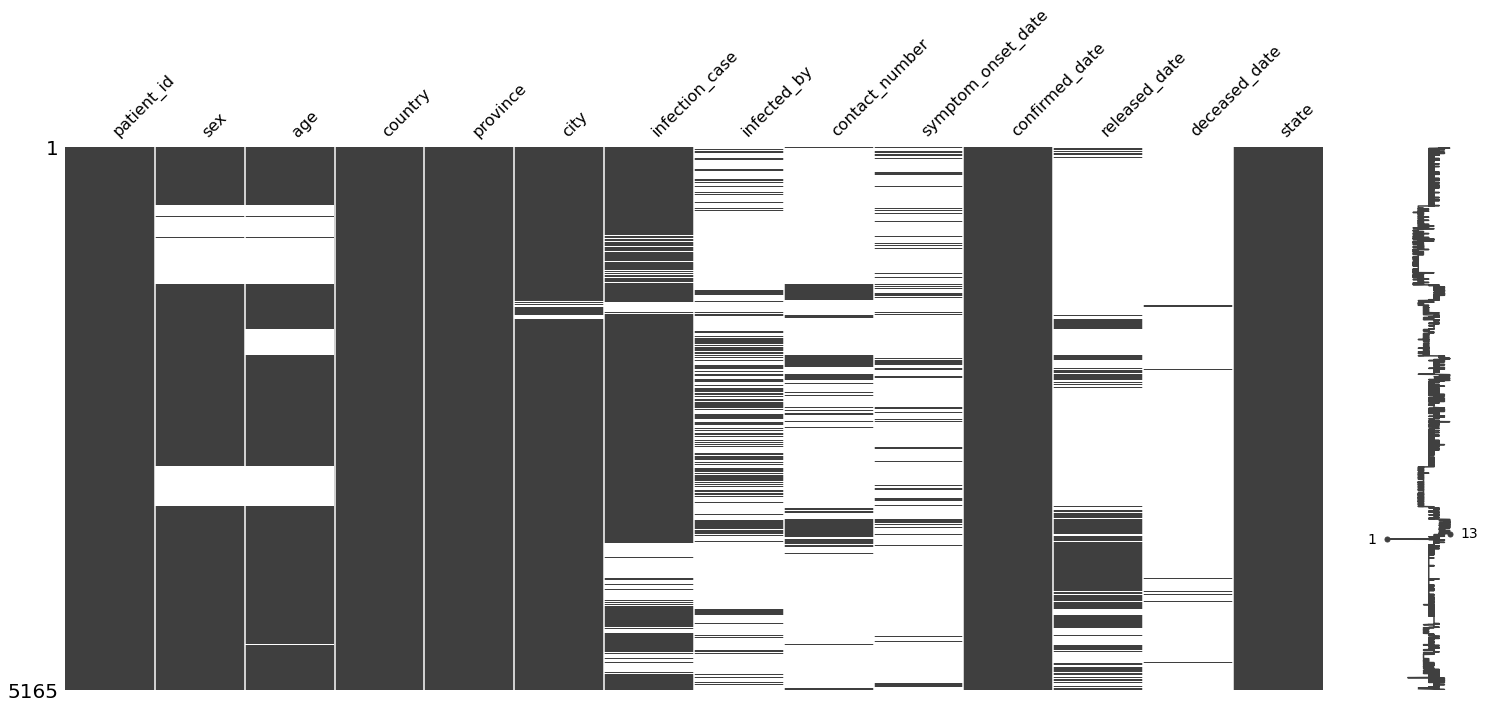

In [7]:
msno.matrix(data)

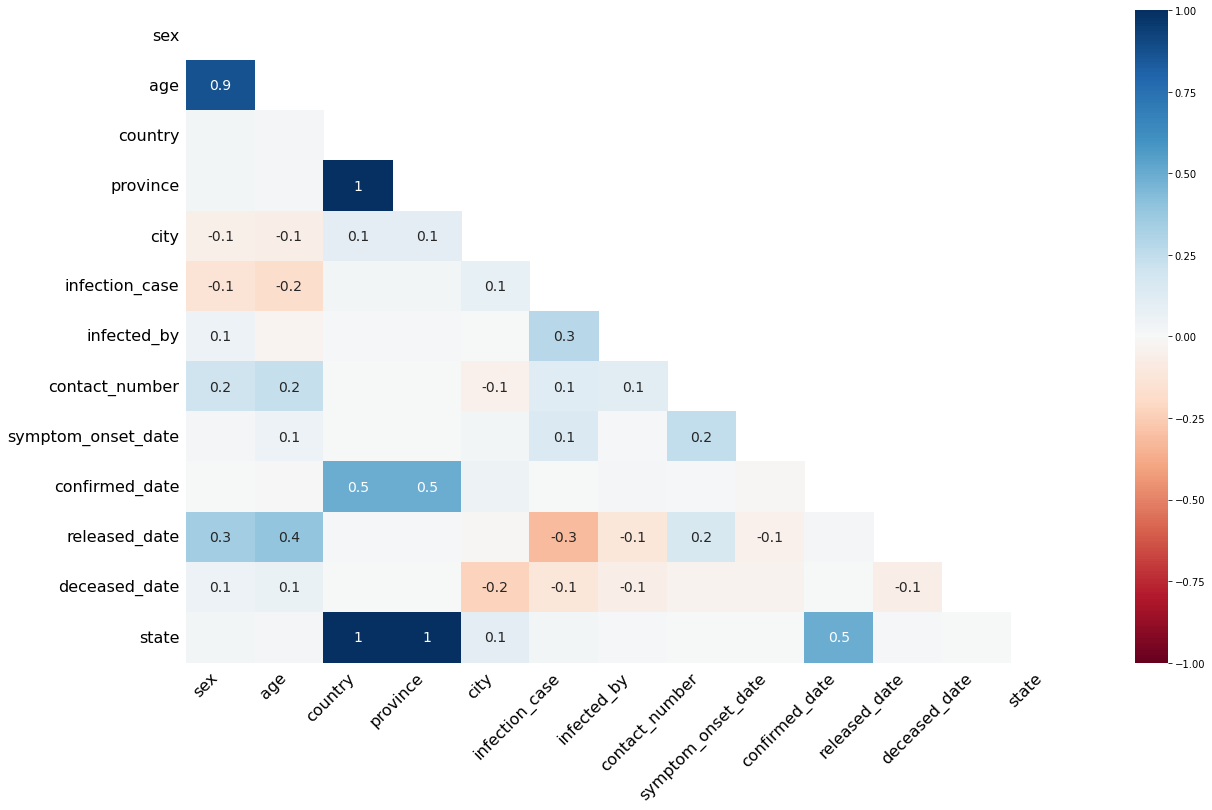

In [8]:
msno.heatmap(data)

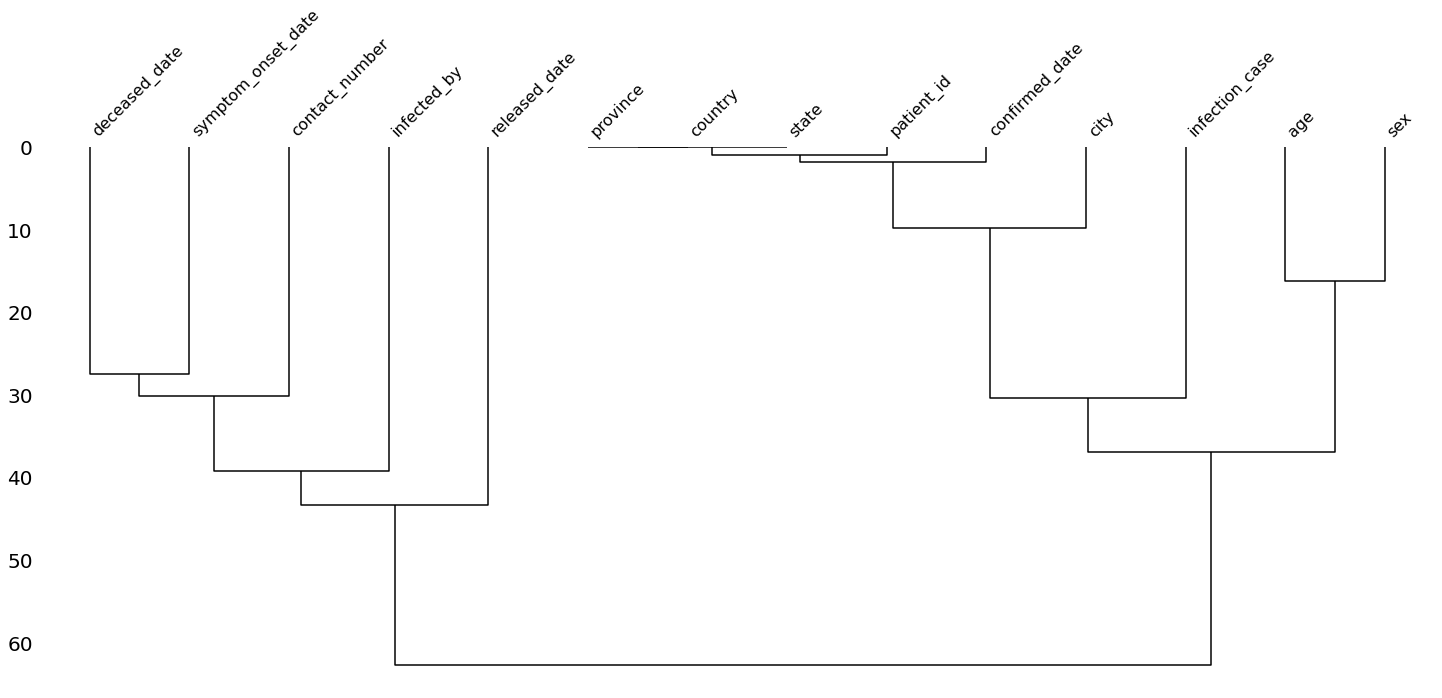

In [9]:
msno.dendrogram(data)

Write the reasons for the missing values

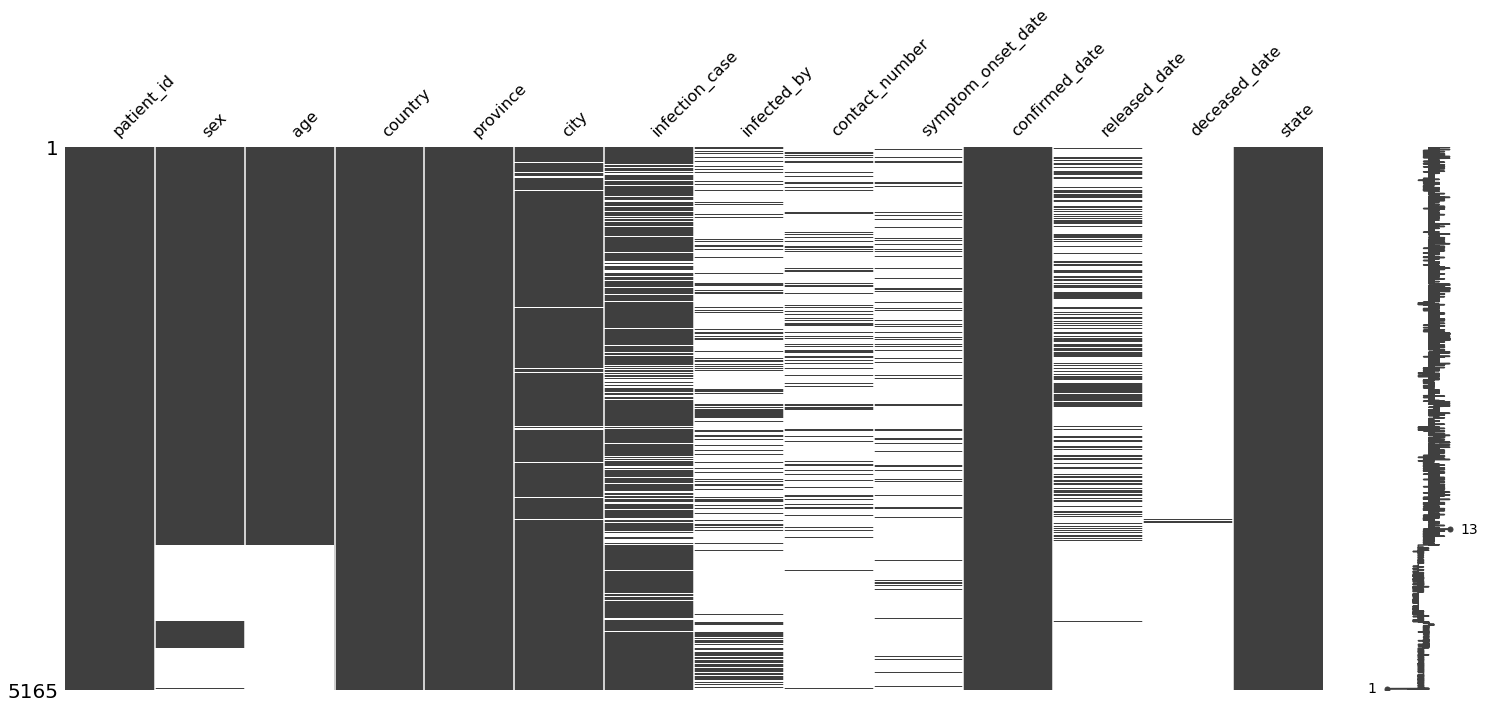

In [10]:
msno.matrix(data.sort_values('age'))

## <font color = 'Orange'>Handle the missing values</font>

After you observed the data, the main goal is to know how the columns depend one to another. Therefore, the next step is to select one of the techniques of Machine Learning: Linear Regression, KNN Classification or Logistic Regression that you will use for handling the missing values. You don't need to use the whole dataset for detecting the missing values in one column, you can use a subset of columns that are making the prediction of the target missing value. 


In [11]:
dataCopy = data.copy()

In [12]:
dataCopy.dropna(subset=['age'],how='any',inplace=True)

In [13]:
dataCopy.dropna(subset=['city'],how='any',inplace=True)

In [14]:
dataCopy.dropna(subset=['sex'],how='any',inplace=True)

In [15]:
dataCopy.dropna(subset=['confirmed_date'],how='any',inplace=True)

In [16]:
dataCopy.drop('deceased_date', axis=1, inplace=True)

In [17]:
dataCopy.drop('symptom_onset_date', axis=1, inplace=True)

In [18]:
missing_values = dataCopy.isnull().sum()
percentage = missing_values / len(dataCopy) * 100
percentage

patient_id         0.000000
sex                0.000000
age                0.000000
country            0.000000
province           0.000000
city               0.000000
infection_case    21.469233
infected_by       74.600163
contact_number    79.723502
confirmed_date     0.000000
released_date     58.145839
state              0.000000
dtype: float64

In [19]:
from sklearn.impute import SimpleImputer
import numpy as np

In [20]:
main_imputer = SimpleImputer(strategy='constant',fill_value='None')

In [21]:
dataCopy.iloc[:,:] = main_imputer.fit_transform(dataCopy)

In [22]:
dataCopy.isnull().sum()

patient_id        0
sex               0
age               0
country           0
province          0
city              0
infection_case    0
infected_by       0
contact_number    0
confirmed_date    0
released_date     0
state             0
dtype: int64

In [23]:
dataCopy

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,confirmed_date,released_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,None,75,2020-01-23,2020-02-05,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,None,31,2020-01-30,2020-03-02,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001.0,17,2020-01-30,2020-02-19,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,None,9,2020-01-30,2020-02-15,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002.0,2,2020-01-31,2020-02-24,released
...,...,...,...,...,...,...,...,...,...,...,...,...
5156,7000000011,male,30s,Korea,Jeju-do,Jeju-do,contact with patient,7000000009.0,5,2020-04-03,2020-05-19,released
5157,7000000012,female,20s,Korea,Jeju-do,Jeju-do,overseas inflow,None,9,2020-04-03,2020-05-05,released
5158,7000000013,female,10s,China,Jeju-do,Jeju-do,overseas inflow,None,6,2020-04-14,2020-04-26,released
5159,7000000014,female,30s,Korea,Jeju-do,Jeju-do,Itaewon Clubs,None,140,2020-05-09,2020-06-12,released


# <font color = 'Orange'> Encode non numerical values </font> 

If this is still not passed on the classes just erase these columns

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
lb = LabelEncoder()
dataCopy['sex'] = lb.fit_transform(dataCopy['sex'])
lb.classes_

array(['female', 'male'], dtype=object)

In [26]:
dataCopy['state'] = lb.fit_transform(dataCopy['state'])
lb.classes_

array(['deceased', 'isolated', 'released'], dtype=object)

In [27]:
dataCopy['infection_case'] = lb.fit_transform(dataCopy['infection_case'])
lb.classes_

array(['Biblical Language study meeting', 'Bonghwa Pureun Nursing Home',
       'Changnyeong Coin Karaoke', 'Cheongdo Daenam Hospital',
       'Coupang Logistics Center', 'Dongan Church',
       'Dunsan Electronics Town', "Eunpyeong St. Mary's Hospital",
       'Geochang Church', 'Guro-gu Call Center',
       'Gyeongsan Cham Joeun Community Center',
       'Gyeongsan Jeil Silver Town', 'Gyeongsan Seorin Nursing Home',
       'Itaewon Clubs', 'KB Life Insurance', 'Milal Shelter',
       'Ministry of Oceans and Fisheries', 'None', 'Onchun Church',
       'Orange Town', 'Pilgrimage to Israel', 'Richway',
       'River of Grace Community Church',
       'SMR Newly Planted Churches Group',
       'Samsung Fire & Marine Insurance', 'Seongdong-gu APT',
       'Seoul City Hall Station safety worker', 'Shincheonji Church',
       'Suyeong-gu Kindergarten', 'contact with patient', 'etc',
       'gym facility in Cheonan', 'gym facility in Sejong',
       'overseas inflow'], dtype=object)

In [28]:
dataCopy['age'] = lb.fit_transform(dataCopy['age'])
lb.classes_

array(['0s', '100s', '10s', '20s', '30s', '40s', '50s', '60s', '70s',
       '80s', '90s'], dtype=object)

In [29]:
dataCopy.drop('country', axis=1, inplace=True)
dataCopy.drop('city', axis=1, inplace=True)
dataCopy.drop('province', axis=1, inplace=True)

In [30]:
dataCopy

,patient_id,sex,age,infection_case,infected_by,contact_number,confirmed_date,released_date,state
0,1000000001,1,6,33,None,75,2020-01-23,2020-02-05,2
1,1000000002,1,4,33,None,31,2020-01-30,2020-03-02,2
2,1000000003,1,6,29,2002000001.0,17,2020-01-30,2020-02-19,2
3,1000000004,1,3,33,None,9,2020-01-30,2020-02-15,2
4,1000000005,0,3,29,1000000002.0,2,2020-01-31,2020-02-24,2
...,...,...,...,...,...,...,...,...,...
5156,7000000011,1,4,29,7000000009.0,5,2020-04-03,2020-05-19,2
5157,7000000012,0,3,33,None,9,2020-04-03,2020-05-05,2
5158,7000000013,0,2,33,None,6,2020-04-14,2020-04-26,2
5159,7000000014,0,4,13,None,140,2020-05-09,2020-06-12,2


# <font color = 'Orange'>Save the new Dataset(.csv) </font>

In [31]:
dataCopy.to_csv('/content/drive/MyDrive/VNP/new_dataset.csv',index=False)

Print the first rows of your final Dataset

In [32]:
dataCopy.head()

,patient_id,sex,age,infection_case,infected_by,contact_number,confirmed_date,released_date,state
0,1000000001,1,6,33,None,75,2020-01-23,2020-02-05,2
1,1000000002,1,4,33,None,31,2020-01-30,2020-03-02,2
2,1000000003,1,6,29,2002000001.0,17,2020-01-30,2020-02-19,2
3,1000000004,1,3,33,None,9,2020-01-30,2020-02-15,2
4,1000000005,0,3,29,1000000002.0,2,2020-01-31,2020-02-24,2


#<font color='orange'>EDA</font>

## <font color='Orange'>Find statistic elements for the continuous variables</font>
Like mean, median,  standard deviation, minimum, maximum, quantile,geometric mean

In [33]:
dataCopy.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


patient_id              inf
sex                0.453239
age                5.003253
infection_case    25.141773
state              1.652751
dtype: float64

In [34]:
dataCopy.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


patient_id        2.000001e+09
sex               0.000000e+00
age               5.000000e+00
infection_case    2.900000e+01
state             2.000000e+00
dtype: float64

In [35]:
dataCopy.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


sex               0.497876
age               2.053247
infection_case    7.909789
state             0.507048
dtype: float64

In [36]:
dataCopy.min()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


patient_id        1000000001
sex                        0
age                        0
infection_case             0
contact_number             -
confirmed_date    2020-01-20
released_date     2020-02-05
state                      0
dtype: object

In [37]:
dataCopy.max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


patient_id        7000000015
sex                        1
age                       10
infection_case            33
contact_number          None
confirmed_date    2020-06-30
released_date           None
state                      2
dtype: object

In [38]:
dataCopy.quantile([0,.25,.5,.75],axis=0)

,sex,age,infection_case,state
0.00,0.0,0.0,0.0,0.0
0.25,0.0,3.0,17.0,1.0
0.50,0.0,5.0,29.0,2.0
0.75,1.0,6.0,30.0,2.0


## <font color = 'Orange'>Find the frequencies for the categorical variables </font>

In [39]:
dataCopy["sex"].value_counts()

0    2017
1    1672
Name: sex, dtype: int64

In [40]:
dataCopy["state"].value_counts()

2    2464
1    1169
0      56
Name: state, dtype: int64

# <font color = 'Orange'>Data visualization </font>

## <font color = 'Orange'>Find the distribution of given attributes</font>


Which of the attributes(columns) did you choose?


age, contact_number

**Make the visualizations using histograms, bar charts, etc.**

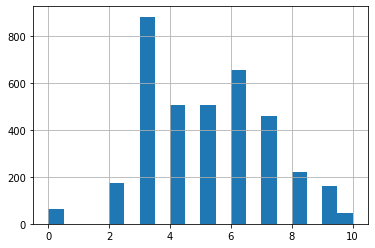

In [41]:
dataCopy['age'].hist(bins=20)

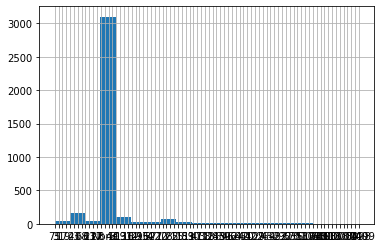

In [42]:
dataCopy['contact_number'].hist(bins=20)


Add as many codeboxes as you need

## <font color = 'Orange'>Visualize the relationship between the attributes</font>

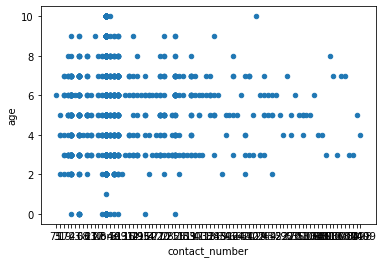

In [43]:
dataCopy.plot.scatter(x='contact_number',y='age')

## <font color = 'Orange'>Make comparison of the columns</font>

Using multiple histograms, box-plots, scatter plots, pairplots, etc.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f93859951d0>,
      dtype=object)

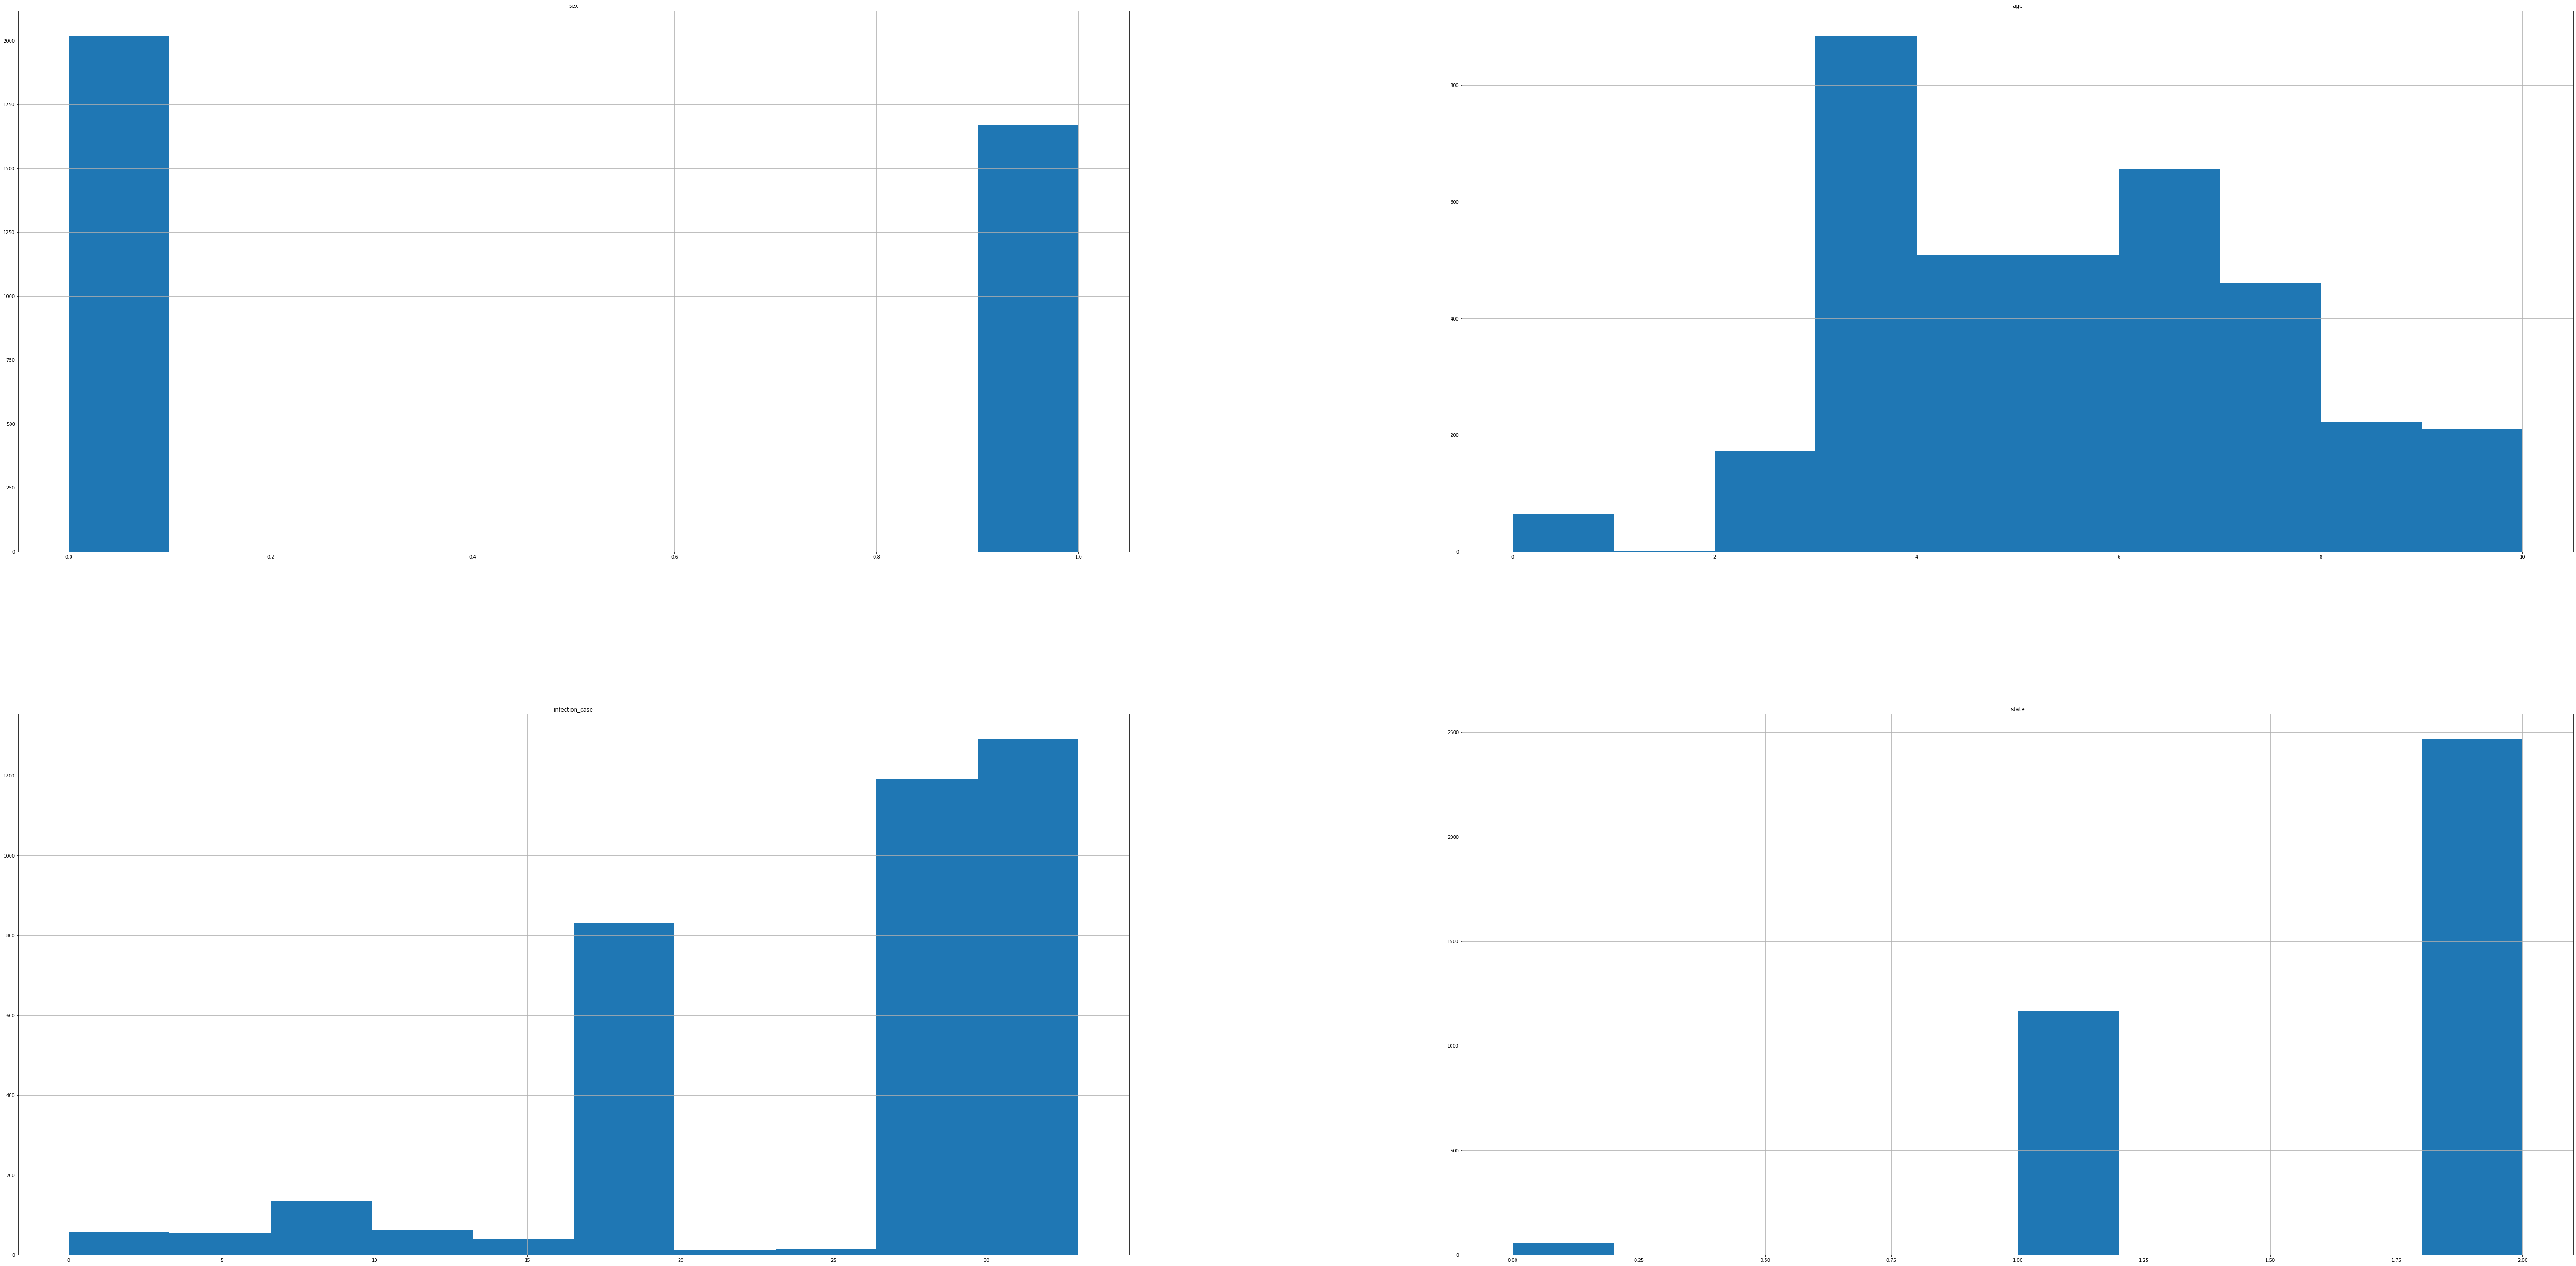

In [44]:
import matplotlib.pyplot as plt
dataCopy.hist(figsize=(100,50))

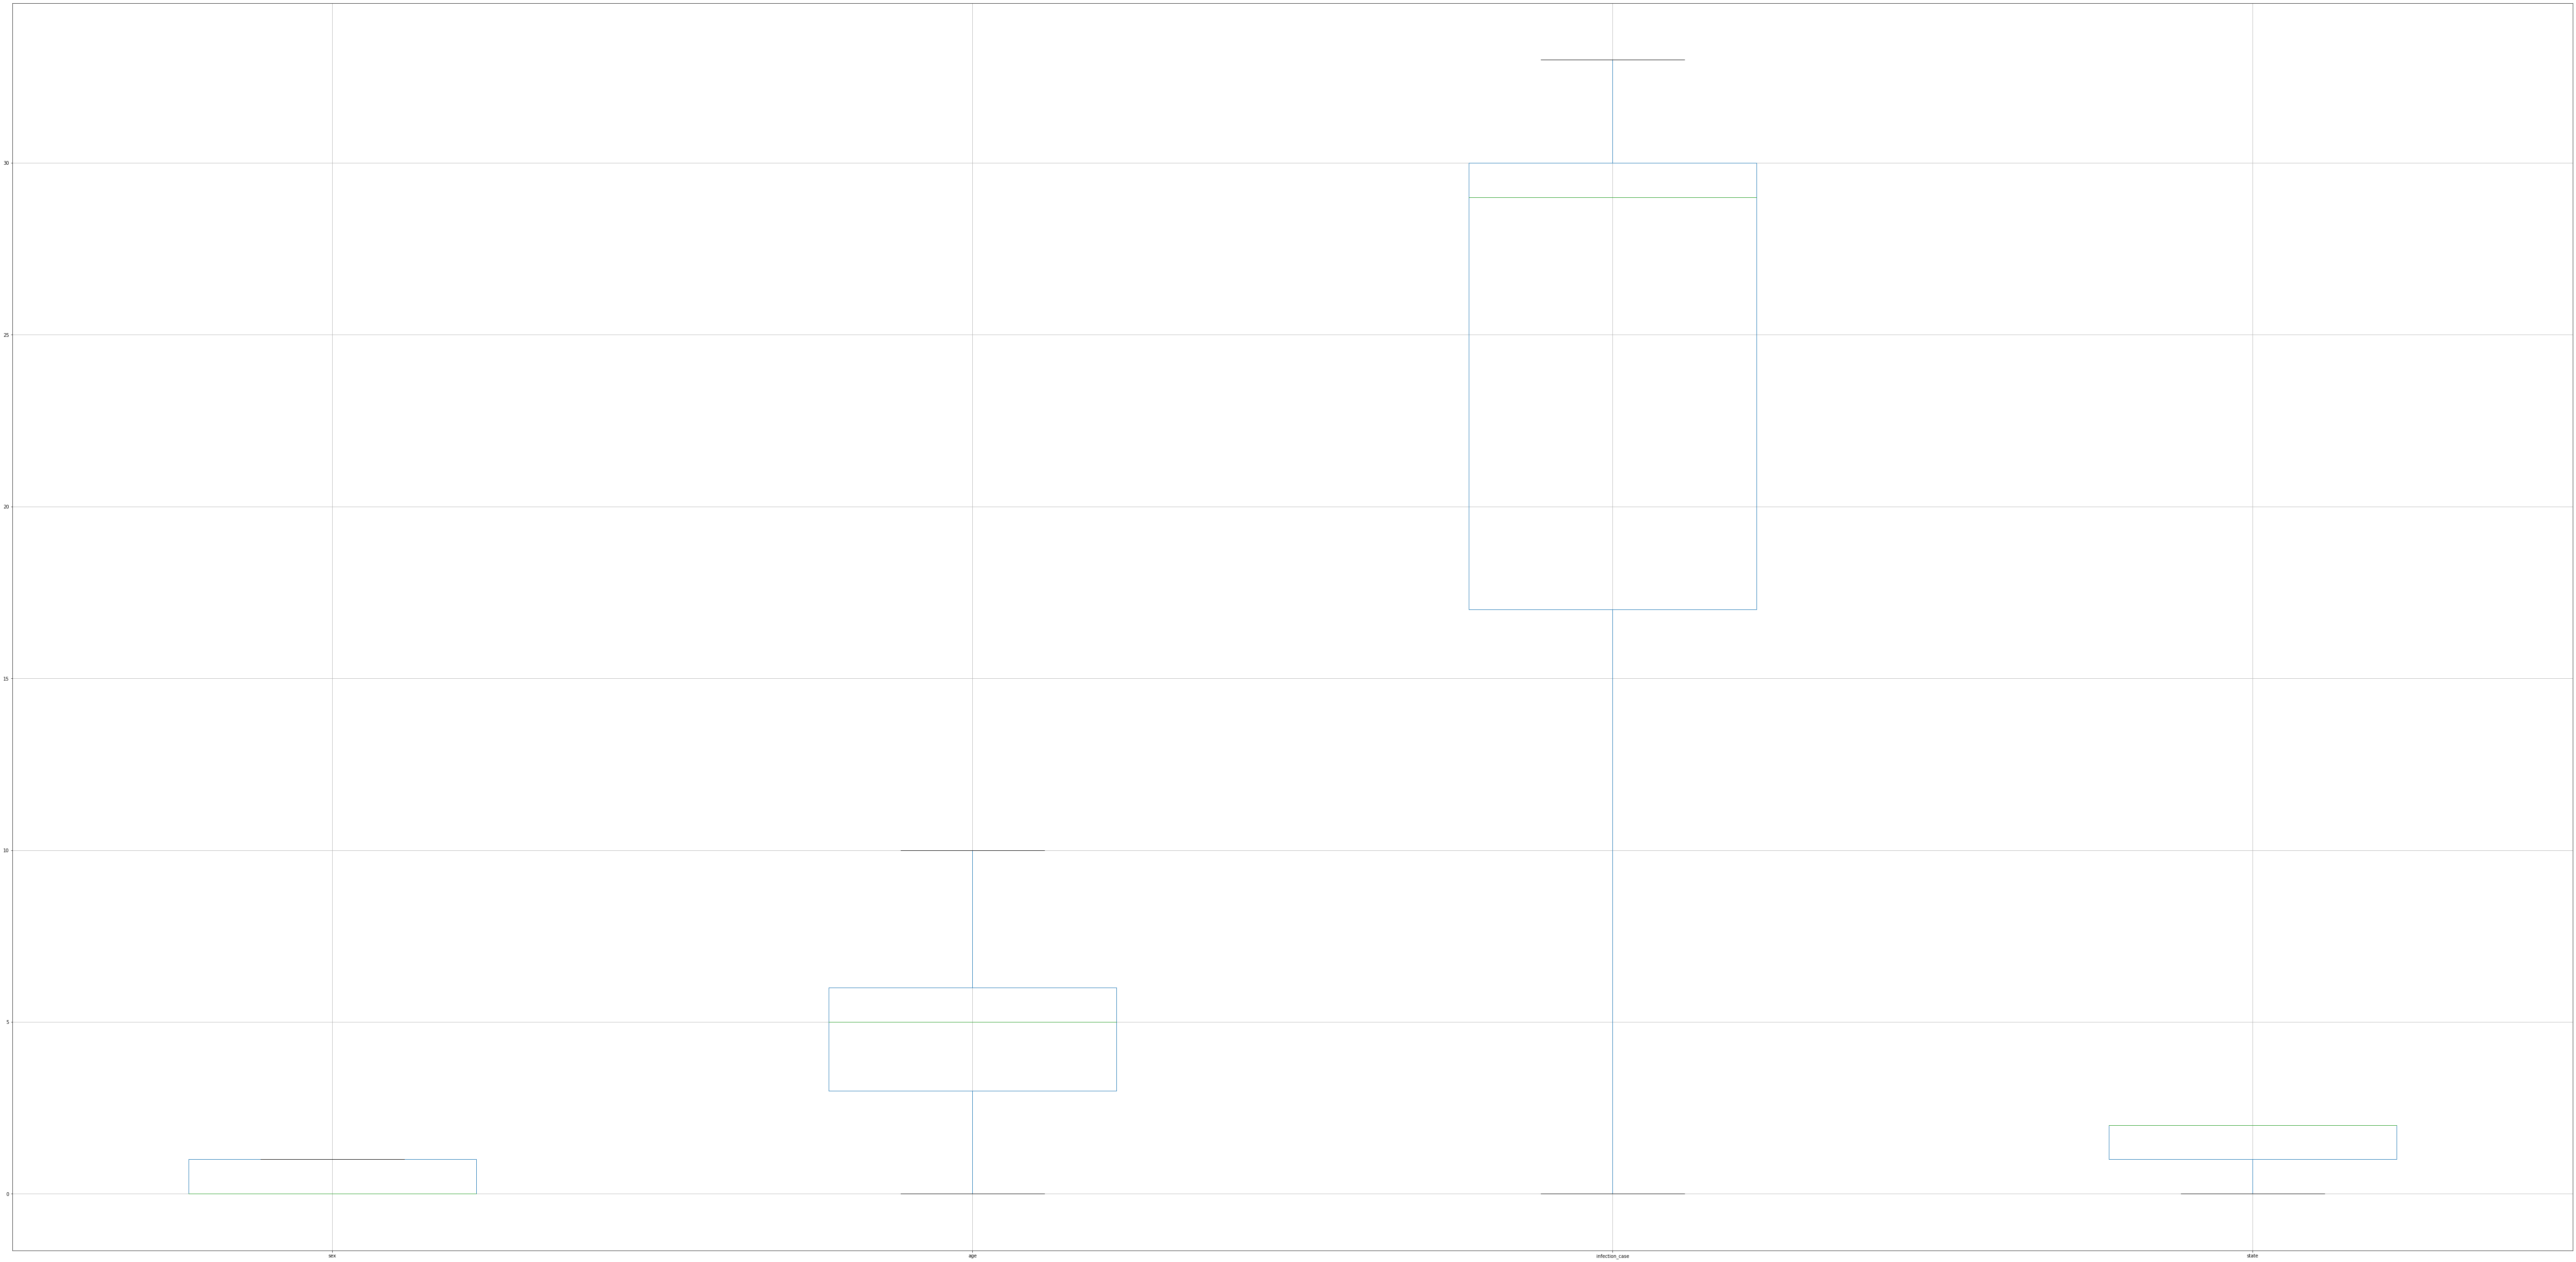

In [45]:
dataCopy.boxplot(figsize=(100,50))

# <font color = 'Orange'>EXTRA: Complex visualizations</font> 
For this you will need a basic knowladge of the Plotly library: https://plotly.com/graphing-libraries/
and for deploying the visualization as a web app you will need the Dash library for that take a look of: https://github.com/plotly/dash

